In [1]:
from tensorflow.keras.datasets import boston_housing
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
(train_data, train_targets), (test_data, test_targets) = (boston_housing.load_data())

In [3]:
mean = train_data.mean(axis = 0)
train_data -= mean
std = train_data.std(axis = 0)
train_data /= std
test_data -=mean
test_data /= std

In [4]:
train_data.shape

(404, 13)

In [5]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, input_shape = (13,), activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])
    model.compile(optimizer='rmsprop', loss = "mse",metrics=["mae"])
   
    return model

In [6]:
model = build_model()

In [7]:
 model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [8]:
#fitting the model and predicting 
# fit network
history=model.fit(x=train_data, y=train_targets, epochs=100, batch_size=32,validation_data= (test_data,test_targets))
y_pred = model.predict(test_data)

Epoch 1/100
13/13 [==============================] - 1s 18ms/step - loss: 530.8483 - mae: 21.2071 - val_loss: 508.5615 - val_mae: 20.7196
Epoch 2/100
13/13 [==============================] - 0s 5ms/step - loss: 440.3706 - mae: 19.0249 - val_loss: 409.9141 - val_mae: 18.2775
Epoch 3/100
13/13 [==============================] - 0s 5ms/step - loss: 344.0572 - mae: 16.4222 - val_loss: 308.8247 - val_mae: 15.4842
Epoch 4/100
13/13 [==============================] - 0s 5ms/step - loss: 247.4016 - mae: 13.5103 - val_loss: 211.0760 - val_mae: 12.4801
Epoch 5/100
13/13 [==============================] - 0s 5ms/step - loss: 162.1377 - mae: 10.4288 - val_loss: 135.2350 - val_mae: 9.8997
Epoch 6/100
13/13 [==============================] - 0s 6ms/step - loss: 102.1741 - mae: 8.0270 - val_loss: 87.6475 - val_mae: 7.8306
Epoch 7/100
13/13 [==============================] - 0s 5ms/step - loss: 67.4601 - mae: 6.4273 - val_loss: 60.7177 - val_mae: 6.2793
Epoch 8/100
13/13 [=============================

13/13 [==============================] - 0s 6ms/step - loss: 7.7521 - mae: 1.9472 - val_loss: 23.2951 - val_mae: 3.0935
Epoch 63/100
13/13 [==============================] - 0s 7ms/step - loss: 7.6390 - mae: 1.9508 - val_loss: 21.4897 - val_mae: 2.8718
Epoch 64/100
13/13 [==============================] - 0s 8ms/step - loss: 7.5712 - mae: 1.9004 - val_loss: 20.6816 - val_mae: 2.7982
Epoch 65/100
13/13 [==============================] - 0s 6ms/step - loss: 7.5508 - mae: 1.9139 - val_loss: 20.8125 - val_mae: 2.7882
Epoch 66/100
13/13 [==============================] - 0s 5ms/step - loss: 7.6940 - mae: 1.9519 - val_loss: 21.4346 - val_mae: 2.8632
Epoch 67/100
13/13 [==============================] - 0s 6ms/step - loss: 7.4085 - mae: 1.9081 - val_loss: 21.4326 - val_mae: 2.8285
Epoch 68/100
13/13 [==============================] - 0s 6ms/step - loss: 7.3431 - mae: 1.9101 - val_loss: 22.2746 - val_mae: 2.8828
Epoch 69/100
13/13 [==============================] - 0s 6ms/step - loss: 7.2921 -

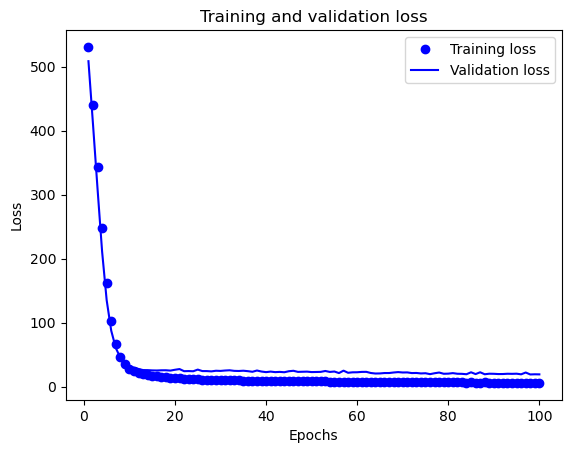

In [9]:
history_dict = history.history
mae = history_dict['mae']

import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss'] 
val_loss_values = history_dict['val_loss']
epochs = range(1, len(mae) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss') 
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend()
plt.show()

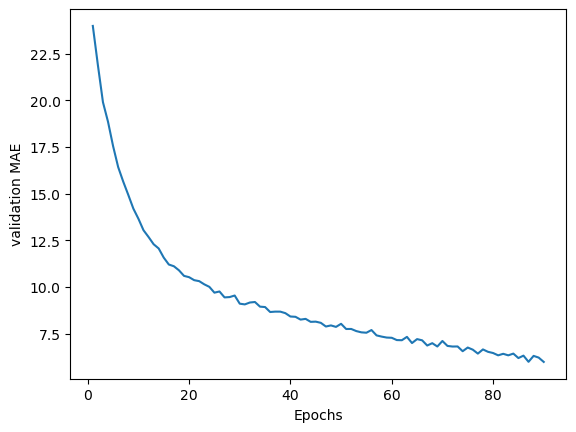

In [15]:
loss_values = history_dict['loss'] 
val_loss_values = history_dict['val_loss']

truncated_loss_values = loss_values[10:]
truncated_val_loss_values = val_loss_values[10:]

plt.plot(range(1, len(truncated_loss_values) + 1), truncated_loss_values)
plt.plot(range(1, len(truncated_loss_values) + 1), truncated_loss_values)
plt.xlabel("Epochs")
plt.ylabel("validation MAE")
plt.show()

In [ ]:
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("validation MAE")
plt.show()